In [419]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import sys, os
import numpy as np
import lumapi
import utils
import braggtools as bt
import importlib

In [420]:
emeApi = lumapi.MODE()
emeApi.importmaterialdb('silicon_thermal.mdf')
emeApi.importmaterialdb('sio2_thermal.mdf')

In [421]:
um = 1e-6
nm = 1e-9

thickness = 0.22e-6 #0.2232*um
thick_BOX = 2*um

W_bragg = 1530*nm

width = 0.5*um # Waveguide width
Delta_W = 20*nm #26.25*nm Corrugation width
W_great = width + Delta_W
W_small = width - Delta_W

L_pd = 317*nm # Grating period

material_Si ='silicon_thermal' #"Si (Silicon) - Palik"
material_BOX = "SiO2 thermal"

w_box = 2*um
t_box = 2*um
nb = 500
wvg = np.linspace(1500e-9, 1600e-9, nb)


In [422]:
# um = 1e-6
# nm = 1e-9
# thick_Si = 220.5*nm
# thick_BOX = thick_Si*10
# width_ridge = 0.5*um # Waveguide width
# Delta_W = 26.25*nm # Corrugation width
# L_pd = 320*nm # Grating period
# t = 300
# material_Si ='silicon_thermal' #
# material_BOX = "SiO2 thermal"
# nb=500
# wvg = np.linspace(1500e-9, 1600e-9, nb)


## FDE

In [423]:
group_index_high ,neff_high,group_index_low,neff_low = utils.construir_bragg_e_retornar_indices_efetivos(emeApi,L_pd,W_great,W_small,thickness,material_Si,material_BOX,3*width,3*thickness,3*W_great,3*thickness,Temperatura=298)
print("high index - ng = ", group_index_high," neff = ", neff_high)

print("low index - ng = ", group_index_low," neff = ", neff_low)

high index - ng =  4.455411328335802  neff =  2.3905852906110305
low index - ng =  4.357843244957134  neff =  2.4567077040058245


In [ ]:
Lambda = W_bragg/((neff_low+neff_high))
print("Lambda = ", Lambda*1e9, " nm")
Lambda = 315.638*nm

Lambda =  315.6400906029688  nm


## EME

In [425]:
S = np.linspace(0,0.008,1)
print(S*1e3," milistrain")
Lambda_strain = L_pd*(1+S)
print(Lambda_strain*1e9, "nm")

[0.]  milistrain
[317.] nm


In [426]:

phases = 3
periods = [45,104,104,45]
mesh = 0.01e-6

variacao_apenas_em_x = 1
variacao_apenas_em_y = 0
variacao_apenas_em_z = 0

Reflectance = []
S11_modulo = []
S11_fase = []
S21_modulo = []
S21_fase = []

for i in range(len(S)):
    print(L_pd*(1+S[i]*variacao_apenas_em_x))
    R, S11M, S11F,S21M,S21F = utils.bragg_integrado_com_phase_shifter(emeApi,Lambda*(1+S[i]*variacao_apenas_em_x),W_great*(1+S[i]*variacao_apenas_em_y),
                                                                      W_small*(1+S[i]*variacao_apenas_em_y),width*(1+S[i]*variacao_apenas_em_y),
                                                                      thickness*(1+S[i]*variacao_apenas_em_z),
                                                                      w_box*(1+S[i]*variacao_apenas_em_y),t_box*(1+S[i]*variacao_apenas_em_z),
                                                                      material_Si,material_BOX,wvg[0],wvg[-1],nb,periods=np.array([45,104,104,45]),
                                                                      Phases=phases,condicao="PML")                   
    # R, S11M, S11F,S21M,S21F = bt.func_extra(bt,importlib,emeApi, phases, L_pd*(1+S[i]*variacao_apenas_em_x), 
    #                                         width_ridge*(1+S[i]*variacao_apenas_em_y), Delta_W*(1+S[i]*variacao_apenas_em_y),
    #                                         thick_Si*(1+S[i]*variacao_apenas_em_z), material_Si, 
    #                                         thick_BOX*(1+S[i]*variacao_apenas_em_z),periods,material_BOX,mesh,1.5e-6,1.6e-6,500,300)
    Reflectance.append(R)
    S11_modulo.append(S11M)
    S11_fase.append(S11F)
    S21_modulo.append(S21M)
    S21_fase.append(S21F)


3.1700000000000005e-07


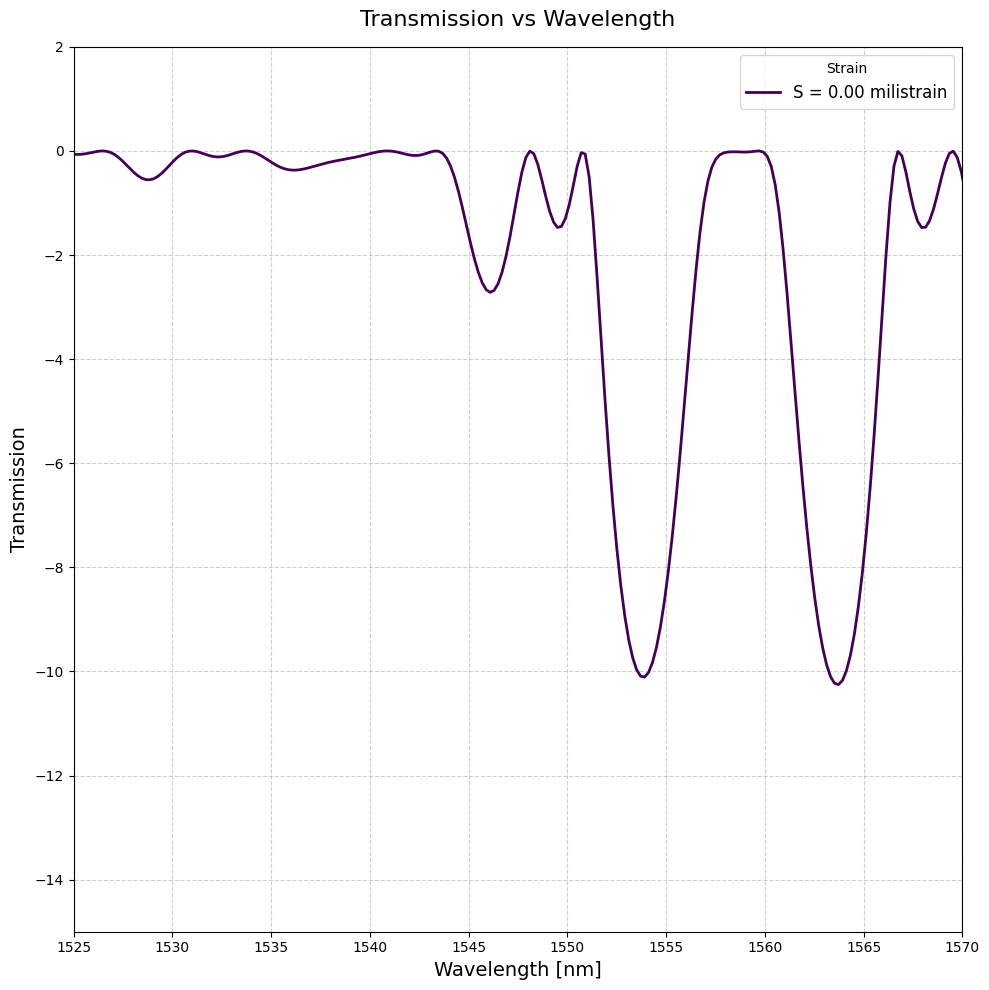

In [427]:
cmap = plt.cm.viridis 

plt.figure(figsize=(10, 10))

x_max1, _ = utils.achar_x_e_y_maximo_em_um_intervalo_quando_tiver_varios_picos(
    S21_modulo[0], wvg*1e9, 1545, 1550
)

if(len(S)>0):
    for i in range(len(S)):
        if(i%5==0):
            plt.plot(
                wvg * 1e9,
                20*np.log10(S21_modulo[i]),
                markerfacecolor='none',  # bola vazada
                markersize=6,
                linewidth=2,
                color=cmap(0.8*i/len(S)),
                label = f"S = {S[i]*1e3:.2f} milistrain"
            )
        else:
            plt.plot(
                wvg * 1e9,
                20*np.log10(S21_modulo[i]),
                markerfacecolor='none',  # bola vazada
                markersize=6,
                linewidth=2,
                color=cmap(0.8*i/len(S)),
                alpha = 0.3,
                label = f"S = {S[i]*1e3:.2f} milistrain"
            )
            



plt.xlim(1525,1570)
plt.ylim(-15,2)

plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Transmission", fontsize=14)
plt.title("Transmission vs Wavelength", fontsize=16, pad=15)
plt.legend(title="Strain", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\Reflectance_vs_wavelength_zerostrain.png", dpi=300, bbox_inches="tight")


plt.show()

In [428]:

def ler_txt(local,i):

    arquivo = local

    with open(arquivo, "r") as f:
        linhas = f.readlines()

    wavelength = np.array([float(v) for v in linhas[0].strip().split(",")[1:]])
    resultado = np.array([float(v) for v in linhas[i].strip().split(",")[1:]])

    return wavelength, resultado 

C:\Users\gson5\AppData\Local\Temp\ipykernel_50876\3367003953.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Strain", fontsize=12)


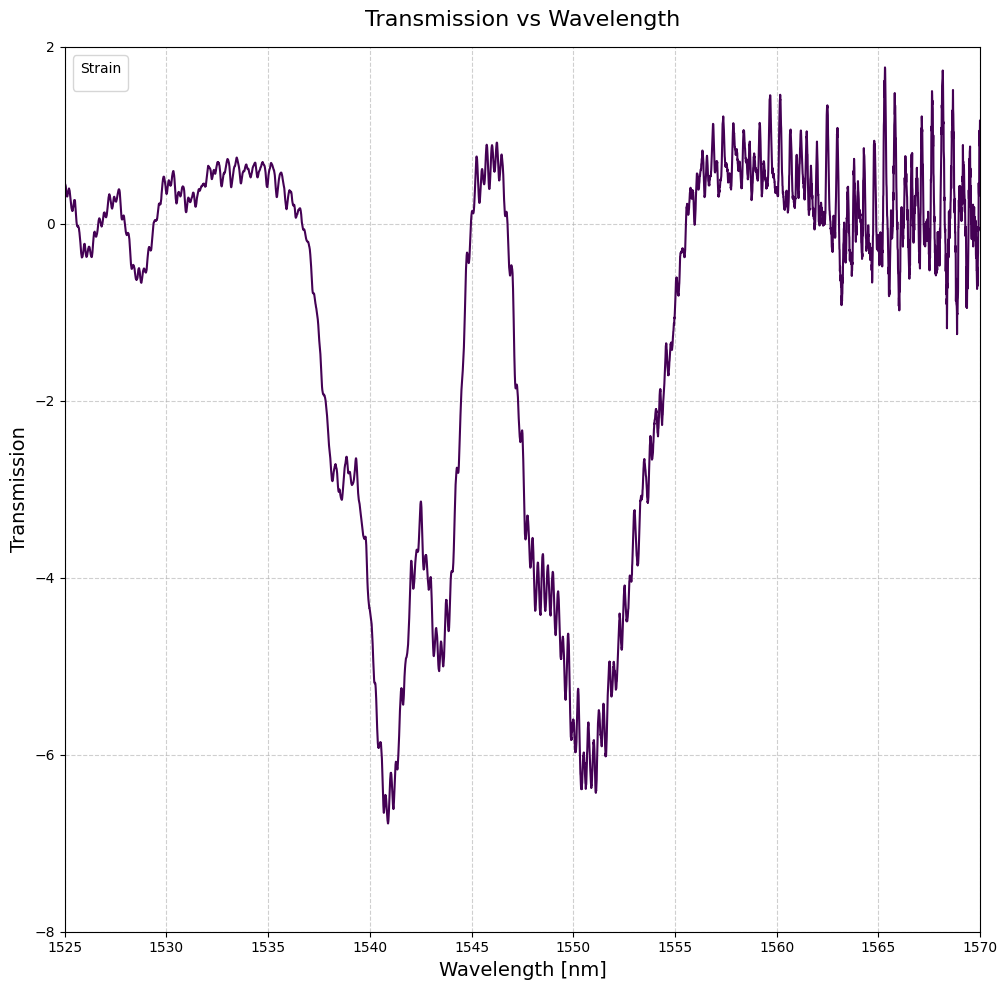

In [429]:
txt = "1PhaseErick"

compensar = r"C:\Users\gson5\Downloads\Photonics-API-lumapi\STRAIN SENSOR\SILICON BRAGG\RESULTADO EXPERIMENTAL\LucasLobo7_ForCompensation\arquivo.csv"
arquivo0 = rf"C:\Users\gson5\Downloads\Photonics-API-lumapi\STRAIN SENSOR\SILICON BRAGG\RESULTADO EXPERIMENTAL\LucasLobo7_{txt}\arquivo.csv"
arquivo1 = rf"C:\Users\gson5\Downloads\Photonics-API-lumapi\STRAIN SENSOR\SILICON BRAGG\RESULTADO EXPERIMENTAL\LucasLobo7_{txt}\arquivo.csv"
arquivo2 = rf"C:\Users\gson5\Downloads\Photonics-API-lumapi\STRAIN SENSOR\SILICON BRAGG\RESULTADO EXPERIMENTAL\LucasLobo7_{txt}\arquivo.csv"

wavelengths2, comp4 = ler_txt(compensar,4)
_, channel0 = ler_txt(arquivo0,4)
_, channel1 = ler_txt(arquivo1,4)
_, channel2 = ler_txt(arquivo2,4)

sub0 = comp4-channel0
sub1 = comp4-channel1
sub2 = comp4-channel2

cmap = plt.cm.viridis 

plt.figure(figsize=(10,10))
plt.plot(wavelengths2, -sub0, alpha = 1,color=cmap(0))
# plt.plot(wvg * 1e9, 20*np.log10(S21_modulo[0]), color= cmap(0.5),label = f"S = {S[0]*1e3:.2f} milistrain")
plt.legend(title="Strain", fontsize=12)

# plt.plot(wavelengths2, -sub1, alpha = 0.5,color=cmap(0.7))
# plt.plot(wavelengths2, -sub2, alpha = 0.5, color=cmap(1))
plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Transmission", fontsize=14)
plt.title("Transmission vs Wavelength", fontsize=16, pad=15)

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.xlim(1525,1570)
plt.ylim(-8,2)

plt.savefig(os.getcwd() + fr"\RESULTADOS_EXPERIMENTAIS IMAGENS\{txt}.png", dpi=300, bbox_inches="tight")

plt.show()

In [410]:
S11 = np.zeros((len(wvg), 2*len(S)))
S21 = np.zeros((len(wvg), 2*len(S)))

for i in range(0,len(S),1):
    S11[:,2*i] = S11_modulo[i]
    S11[:,2*i+1] = S11_fase[i]

    S21[:,2*i] = S21_modulo[i]
    S21[:,2*i+1] = S21_fase[i]


In [411]:
filepath = os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER"
tamanho = len(os.listdir(filepath))

for i in range(tamanho):
    os.remove(os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")

In [412]:

# Parâmetros
c = 3e8
coln = 3
TM = np.transpose(S)
numMode = 1  # 1 modo
numPort = 2  # 2 portas
modeLabel = ["TE"]  # lista com rótulos de modos

for i in range(len(S)):
    filename = os.getcwd() + fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat"
    with open(filename, "w") as f:
        for kk in range(numMode):
            for mm in range(numPort):  # porta de saída
                for nn in range(numPort):  # porta de entrada
                            mystr = (
                                f"(\"port {mm+1}\",\"{modeLabel[kk]}\",{kk+1},"
                                f"\"port {nn+1}\",1,\"modulation\")\n"
                                f"(1,{1})\n"
                            )
                            f.write(mystr)

                            f.write(f"{S[i]:.5f}" + "\n")

                            f.write(f"({len(wvg)},{coln})\n")

                            # Seleciona o conjunto de dados correto
                            if mm == 0 and nn == 0 and kk == 0:  # S11
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))
                            elif mm == 1 and nn == 0 and kk == 0:  # S21
                                mymtrx = np.column_stack((c / wvg, S21[:,2*i:2*i+2]))
                            else:
                                mymtrx = np.column_stack((c / wvg, S11[:,2*i:2*i+2]))

                            # Escreve os dados numéricos
                            np.savetxt(f, mymtrx, fmt="%.6e", delimiter="\t")


In [413]:

x_max_S1 = 1546.2925
x_max_S2 = x_max_S1+1.59
interacoes = 1
qtd_laser = 2
defasagem = x_max_S2-x_max_S1
if (interacoes>1):
    defasagem = np.linspace(0.5,(x_max_S2-x_max_S1), interacoes) 


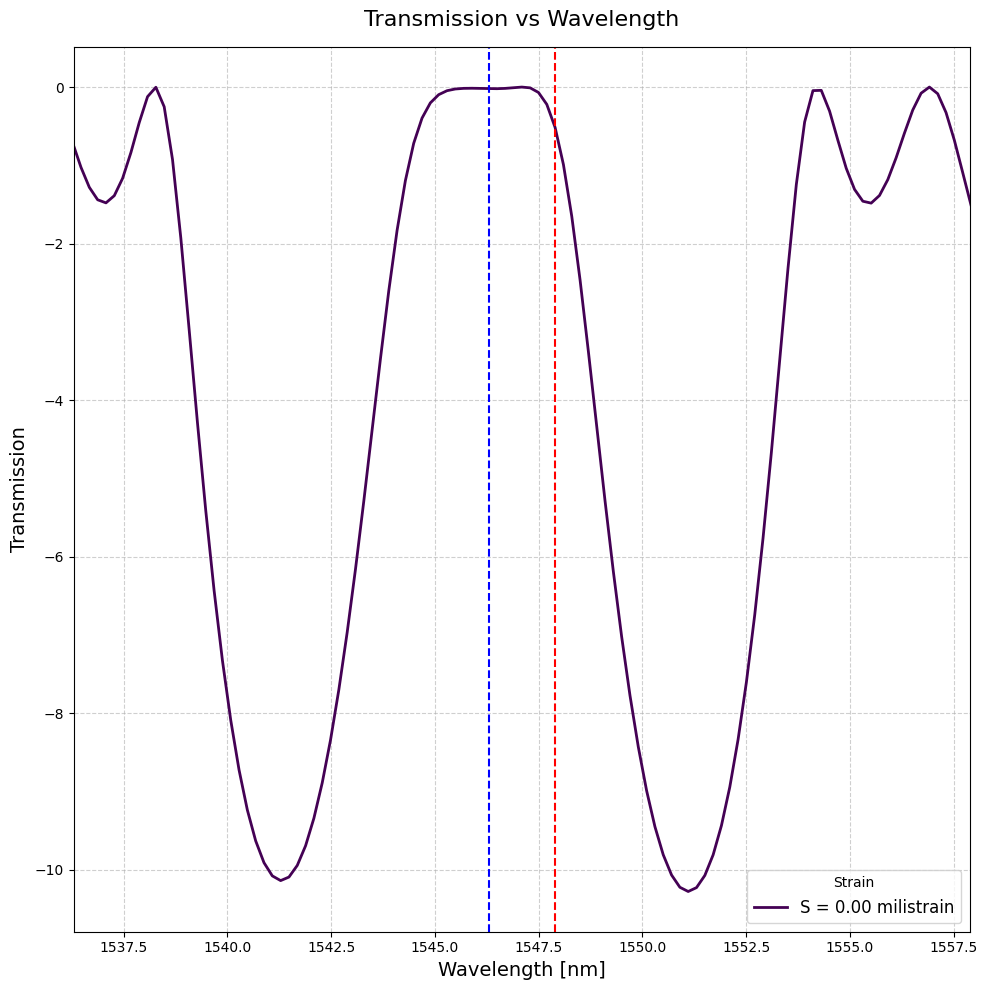

In [414]:
plt.figure(figsize=(10, 10))

cmap = plt.get_cmap('viridis')  # ou outro: 'plasma', 'turbo', etc.

for i in range(len(S)):
    if(i%5==0):
        plt.plot(
            wvg * 1e9,
            20*np.log10(S21_modulo[i]),
            markerfacecolor='none',  # bola vazada
            markersize=6,
            linewidth=2,
            color=cmap(0.8*i/len(S)),
            label = f"S = {S[i]*1e3:.2f} milistrain"
        )
    else:
        plt.plot(
            wvg * 1e9,
            20*np.log10(S21_modulo[i]),
            markerfacecolor='none',  # bola vazada
            markersize=6,
            linewidth=2,
            color=cmap(0.8*i/len(S)),
            alpha = 0.3,
            label = f"S = {S[i]*1e3:.2f} milistrain"
        )

plt.axvline(x=x_max_S1, color ="blue", linestyle ='--')

if (interacoes >1):
    for j in range(interacoes):
        x_max_S2=x_max_S1 + defasagem[j]
        if(j%(interacoes-1) == 0):
            plt.axvline(x=x_max_S2, color ="red",alpha=1, linestyle ='--')
        else:
            plt.axvline(x=x_max_S2, color ="red",alpha=0.2, linestyle ='--')
else:
    plt.axvline(x=x_max_S1+defasagem, color ="red", linestyle ='--')

plt.xlim(x_max_S1 - 10, x_max_S2 + 10)

plt.xlabel("Wavelength [nm]", fontsize=14)
plt.ylabel("Transmission", fontsize=14)
plt.title("Transmission vs Wavelength", fontsize=16, pad=15)

plt.legend(title="Strain", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig(os.getcwd() + fr"\RESULTADOS2\Transmission_vs_wavelength_strain_com_comprimentos_dos_lasers.png", dpi=300, bbox_inches="tight")

plt.show()



In [415]:
pmS1 = np.zeros([len(S),interacoes])
pmS2 = np.zeros([len(S),interacoes])
pmS3 = np.zeros([len(S),interacoes])
pmS4 = np.zeros([len(S),interacoes])
inter = lumapi.INTERCONNECT()

for j in range(interacoes):
    for i in range(len(S)):
        if(interacoes>1):
            P1,P2 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9,defasagem[j]*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
        else:
            P1,P2 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9,defasagem*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
            
            if(qtd_laser == 3):
                P3,P4 = utils.funcao_que_gera_o_ambiente_de_simulacao_e_calcula_a_potencia_na_saida_de_n_laser(inter,x_max_S1*1e-9+defasagem*1e-9,defasagem*1e-9,os.getcwd() +fr"\BRAGG STRAIN PHASE SHIFTER\bragg_strain_{i+1}.dat")
                pmS3[i,j] = P3
                pmS4[i,j] = P4
        pmS1[i,j] = P1
        pmS2[i,j] = P2


C:\Users\gson5\AppData\Local\Temp\ipykernel_50876\2449101513.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(


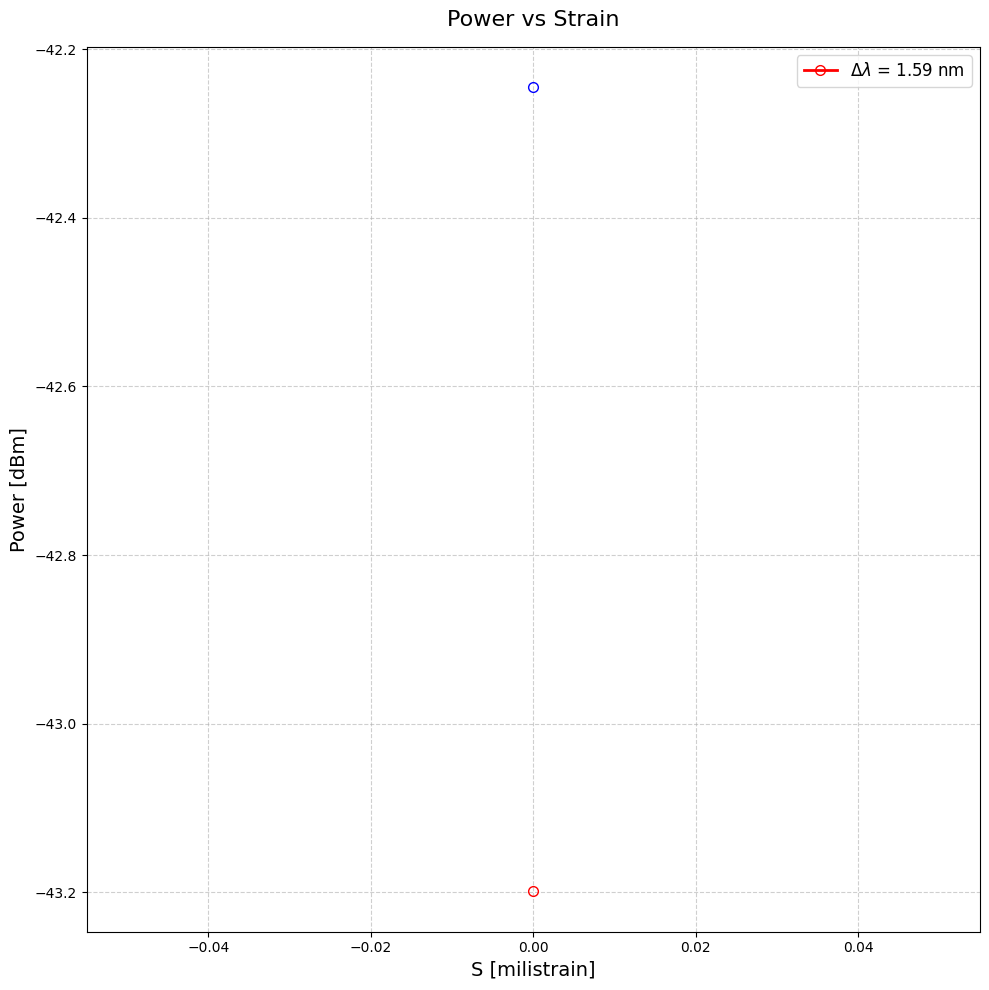

In [416]:
if interacoes == 1:
    plt.figure(figsize=(10, 10))

    for j in range(interacoes):
        plt.plot(
            S*1e3, pmS1[:,j],
            '-o',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            linestyle = "-",
            color = "blue"
        )

        plt.plot(
            S*1e3, pmS2[:,j],
            '-o',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            color = "red",
            label=fr"$\Delta \lambda$ = {defasagem:.2f} nm"
        )
        
    plt.xlabel("S [milistrain]", fontsize=14)
    plt.ylabel("Power [dBm]", fontsize=14)
    plt.title("Power vs Strain", fontsize=16, pad=15)

    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.savefig(os.getcwd() + fr"\RESULTADOS2\potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()


<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\D'
<>:85: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\D'
<>:26: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:75: SyntaxWarning: invalid escape sequence '\D'
<>:85: SyntaxWarning: invalid escape sequence '\D'
<>:98: SyntaxWarning: invalid escape sequence '\R'
C:\Users\gson5\AppData\Local\Temp\ipykernel_50876\463955747.py:16: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_50876\463955747.py:26: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_50876\46395574

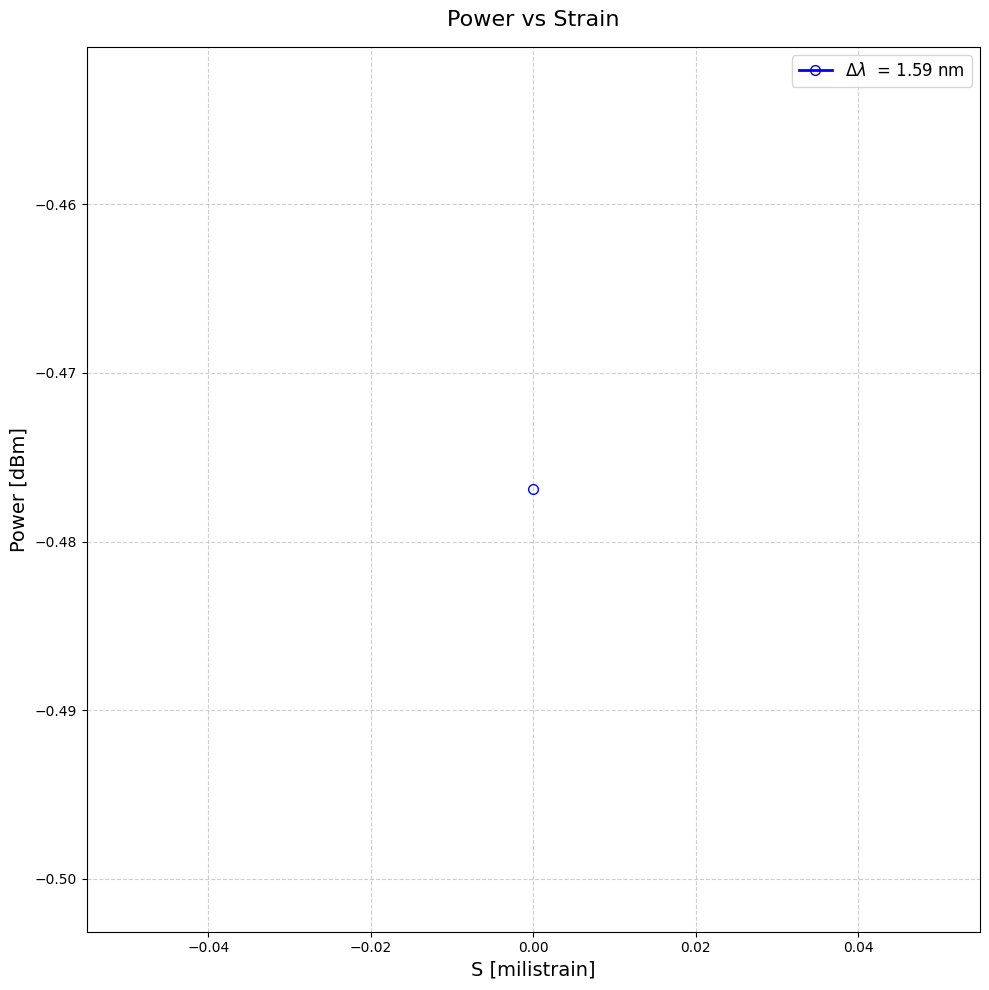

In [417]:
indice_do_vetor_ate_onde_a_razao_eh_linear = 10

if (interacoes>1):
    plt.figure(figsize=(10, 10))

    for j in range(interacoes):
        
        if j==0:
            plt.plot(
                S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
                '-o',
                color="black",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        elif j==4:
            plt.plot(
                S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
                '-o',
                color="blue",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        elif j==5:
            plt.plot(
                S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
                '-o',
                color="green",
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                label = f"$\Delta \lambda$ = {defasagem[j]:.2f} nm"
            )
        else:
            plt.plot(
                S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
                '-',
                color='red',
                markerfacecolor='none',
                markersize=7,
                linewidth=2,
                alpha = 0.2
            )

    
    plt.axvline(x=S[indice_do_vetor_ate_onde_a_razao_eh_linear]*1e3, linestyle="--",
                 label =f"S = {S[indice_do_vetor_ate_onde_a_razao_eh_linear]*1e3:.2f} milistrain")

    plt.xlabel("Strain [milistrain]", fontsize=14)
    plt.ylabel("P1/P2", fontsize=14)
    plt.title("P1/P2 vs Strain", fontsize=16, pad=15)

    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    plt.savefig(os.getcwd() + fr"\RESULTADOS2\razao_potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()
else:
    plt.figure(figsize=(10, 10))

    # Linha 1 com bolas vazadas
    plt.plot(
        S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
        '-o',
        color='blue',
        markerfacecolor='none',
        markersize=7,
        linewidth=2,
        label=f"$\Delta \lambda$  = {defasagem:.2f} nm"
    )
    if(qtd_laser==3):
        plt.plot(
            S*1e3, pmS3[:,0]/pmS4[:,0],
            '-o',
            color='red',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            label=f"$\Delta \lambda$ = {2*defasagem:.2f} nm"
        )
    # Labels e título
    plt.xlabel("S [milistrain]", fontsize=14)
    plt.ylabel("Power [dBm]", fontsize=14)
    plt.title("Power vs Strain", fontsize=16, pad=15)

    # Estética
    plt.legend(fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()

    # Salvar em alta resolução
    plt.savefig(os.getcwd() + "\RESULTADOS2\potencia_vs_strain.png", dpi=300, bbox_inches="tight")

    plt.show()


In [418]:
indice_do_grafico = 0


razao=(np.array(pmS2[:,indice_do_grafico])-np.array(pmS1[:,indice_do_grafico]))/2
razao_ajustada = razao[0:indice_do_vetor_ate_onde_a_razao_eh_linear]
S_ajustado = S[0:indice_do_vetor_ate_onde_a_razao_eh_linear]

a, b = np.polyfit(S_ajustado, razao_ajustada, 1)
y_fit = a*S_ajustado + b

sensibilidade = (razao[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-razao[0])/((S[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-S[0]))
sensibilidade_fit = (y_fit[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-y_fit[0])/((S_ajustado[indice_do_vetor_ate_onde_a_razao_eh_linear-1]-S_ajustado[0]))
erro_percentual = np.abs((razao_ajustada - y_fit) / razao_ajustada) * 100
erro_medio = np.mean(erro_percentual)
desvio_padrao_do_erro_percentual = np.std(erro_percentual)

print(y_fit[indice_do_vetor_ate_onde_a_razao_eh_linear-1])
print(y_fit[0])

print(razao[indice_do_vetor_ate_onde_a_razao_eh_linear-1])
print(razao[0])

print(S[indice_do_vetor_ate_onde_a_razao_eh_linear-1]*1e3)
print(S_ajustado[indice_do_vetor_ate_onde_a_razao_eh_linear-1]*1e3)

print("")
print(sensibilidade, "por milistrain - simulado")
print(sensibilidade_fit, "por milistrain - fit")
print(f"Erro percentual medio= {erro_medio:.3f} %")
print("Desvio padrao do erro percentual =", desvio_padrao_do_erro_percentual)


LinAlgError: SVD did not converge in Linear Least Squares

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
C:\Users\gson5\AppData\Local\Temp\ipykernel_21756\69892605.py:14: SyntaxWarning: invalid escape sequence '\D'
  label = f"$\Delta \lambda$ = {defasagem[j] if (interacoes>1) else defasagem:.2f} nm"
C:\Users\gson5\AppData\Local\Temp\ipykernel_21756\69892605.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1000x1000 with 0 Axes>

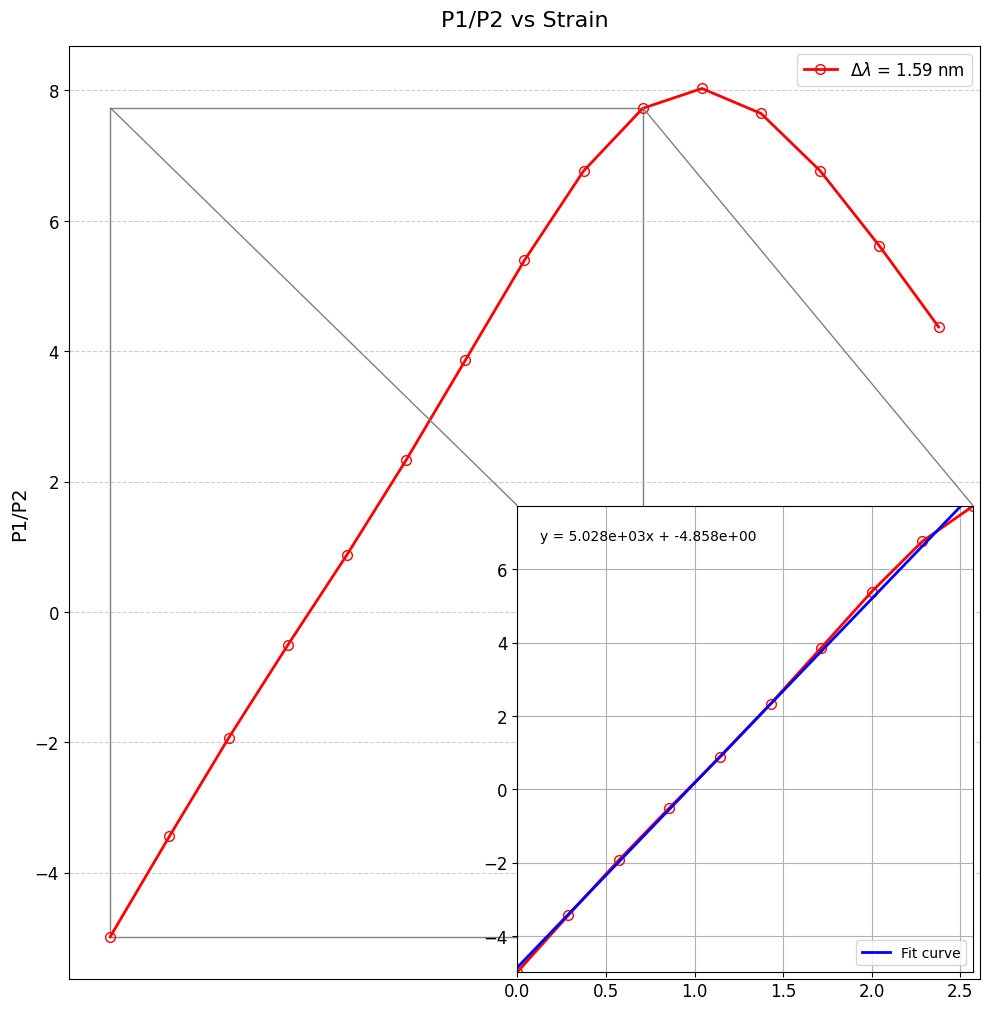

7.712515765417622


In [ ]:
plt.figure(figsize=(10, 10))

fig, ax = plt.subplots(figsize=(10, 10))

for j in range(interacoes):
    if j==indice_do_grafico:
        ax.plot(
            S*1e3,(np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
            '-o',
            color="red",
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            label = f"$\Delta \lambda$ = {defasagem[j] if (interacoes>1) else defasagem:.2f} nm"
        )
    else:
        ax.plot(
            S*1e3, (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2,
            '-',
            color='red',
            markerfacecolor='none',
            markersize=7,
            linewidth=2,
            alpha = 0.2
        )
ax.set_xlabel("Strain [milistrain]", fontsize=14)
ax.set_ylabel("P1/P2", fontsize=14)
ax.set_title("P1/P2 vs Strain", fontsize=16, pad=15)
ax.legend(fontsize=12)
ax.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.set_visible(False)  # remove o eixo x e os ticks
ax.tick_params(axis='both', which='major', labelsize=12)  # muda tamanho dos números do eixo x e y

# Criando o inset (zoom)
axins = inset_axes(ax, width="50%", height="50%", loc='lower right')

for j in range(interacoes):
    y = (np.array(pmS2[:,j])-np.array(pmS1[:,j]))/2
    if j == indice_do_grafico:
        axins.plot(
            S*1e3, y,
            '-o',
            color="red",
            markerfacecolor='none',
            markersize=7,
            linewidth=2
        )
    else:
        axins.plot(
            S*1e3, y,
            '-',
            color='red',
            alpha=0.2,
            linewidth=2
        )

axins.plot(
            S_ajustado*1e3, y_fit,
            '-',
            color='blue',
            alpha=1,
            linewidth=2,
            label = "Fit curve"
        )

# Limites do zoom — ajuste conforme região que deseja destacar
x1, x2 = S[0]*1e3, S[indice_do_vetor_ate_onde_a_razao_eh_linear-1]*1e3  # exemplo de limites no eixo x
y1, y2 = min(razao_ajustada)-0.01, max(razao_ajustada)+0.01  # exemplo de limites no eixo y
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.legend()
axins.grid()
# Texto da equação (formatado)
equacao = f"y = {a:.3e}x + {b:.3e}"
plt.text(0.05, 0.95, equacao, transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top')

# Linha que conecta inset ao gráfico principal
mark_inset(ax, axins, loc1=(1), loc2=2, fc="none", ec="0.5")
axins.tick_params(axis='both', which='major', labelsize=12)  # muda tamanho dos números do eixo x e y

plt.tight_layout()
plt.savefig(os.getcwd() + fr"\RESULTADOS2\razao_potencia_e_fit_vs_strain.png", dpi=300, bbox_inches="tight")
plt.show()

S_novo = 2.5*1e-3  # exemplo
y_fit_novo = a * (S_novo) + b
print(y_fit_novo)